<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%204/Assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First iteration

This is the first iteration towards building our model for the MNIST dataset. In this notebook we would build a barebones neural network model that only uses convolutions and max pooling layers. The description and thought process behind the model is described.

### High level stats:

Total number of params: 7,778
<br>Total number of trainable params: 7,778
<br>Validation accuracy: 98.8%
<br>Training accuracy: 99.62%

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Installing Keras and importing into current runtime environment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing libraries and functions required for the program

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Loading the MNIST dataset. Note that this dataset comes with a ready made train and test set.

(60000, 28, 28)


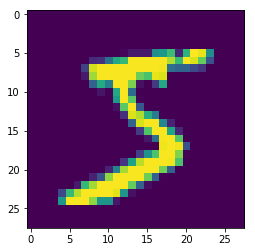

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing the first training image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping images from 28x28 to 28x28x1. This change needs to be done since convolution expects a 3 dimensional matrix.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bringing the values of pixels to 0-255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the first ten labels on the training set. Note that these are numbers at this point. More importantly these numbers have an ordinality amongst them

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the numerical labels to categorical values. This is important since the classes 0-9 are just different classes and have no inherent order amongst them ( i.e 7 is not a lesser class than 8 in any way with respect to digit classification )

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Seeing the categorical representation of the labels for the first ten training images

In [10]:
from keras.layers import Activation, BatchNormalization, Dropout
dropout_rate = 0.5


model = Sequential()

# Convolution block 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) #3x3x1x10 kernel - 26x26x10 image - Receptive Field 3x3
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x10x16 kernel - 24x24x16 image - Receptive Field 5x5

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 12x12x16 image - Receptive Field 10x10
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 12x12x8 image - Receptive Field 10x10

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x8x16 kernel - 10x10x16 image - Receptive Field 12x12
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 8x8x16 image - Receptive Field 14x14

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 4x4x16 image - Receptive Field 28x28
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 4x4x10 image - Receptive Field 28x28

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 2x2x16 image - Receptive Field 28x28

model.add(Convolution2D(10, (2, 2))) # 2x2x16x10 kernel - 1x1x10 image

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


Defining the model.

The thought process behind the architecture was to constantly and aggressively decrease the size of the image from 28x28 to 1x1 through convolutions. This has 2 benefits:

1. We neatly bring the image dimension from 28x28 to 1x1, flatten the image and produce  ing and getting a classification output but also allows the output layer to have a receptive field equal to the full image. Hence, I used a series of 3x3 convolutions

Couple of things to note:

1. Once a 2x2 image size was reached, it didnt make sense to use a 3x3 and then a 1x1 to get to 10 outputs, hence used a 2x2 convolution to directly get to 10 outputs.
2. Why 16 channels in most places?
<br>I started with 16 and 32 channel repetitions and found the number of params crossed the given limit of 15k. Also in the 4th session I noticed architectures with a series of 16 channel layers that worked pretty well. I tried it out, it seemed to have enough expressivity and worked ( produced a validation accuracy of close to 90% )
3. Could we go smaller ( in terms of #layers )?
<br> This is the least number of layers to go from 28x28 to 1x1 through convolutions theoretically. May be one could go smaller in terms of params, but unlikely in number of layers.
4. Receptive field and design choices
<br>A receptive field of 28x28 was achieved 3-4 layers before the last layer in a max pooling layer. However we want the max pooling to be 2-3 layers away from the output layer, hence I added 
4. What other architectures did I consider?
<br> In assignment 3 I had taken 4 3x3 convolutions in each convolution block. While that certainly worked it lead to more parameters in the model and a slower drop in image size. Given the lower #params constraint now, I tried to aggressively decrease the image size further. I did not try 3 convolutions per convolution block, though likely it may have performed well.

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Compiling the model for training

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 299us/step - loss: 0.3046 - acc: 0.9025 - val_loss: 0.0992 - val_acc: 0.9682
Epoch 2/30
60000/60000 [==============================] - 13s 211us/step - loss: 0.0994 - acc: 0.9694 - val_loss: 0.0839 - val_acc: 0.9713
Epoch 3/30
60000/60000 [==============================] - 13s 213us/step - loss: 0.0748 - acc: 0.9767 - val_loss: 0.0567 - val_acc: 0.9823
Epoch 4/30
60000/60000 [==============================] - 13s 218us/step - loss: 0.0613 - acc: 0.9812 - val_loss: 0.0506 - val_acc: 0.9844
Epoch 5/30
60000/60000 [==============================] - 12s 207us/step - loss: 0.0526 - acc: 0.9841 - val_loss: 0.0772 - val_acc: 0.9749
Epoch 6/30
60000/60000 [==============================] - 12s 206us/step - loss: 0.0470 - acc: 0.9849 - val_loss: 0.0392 - val_acc: 0.9865
Epoch 7/30
60000/60000 [==============================] - 12s 206us/

Fitting the model through gradient descent and tracking the validation accuracy through the training process. The training process itself only focusses on minimizing the loss function. We keep track of the training and validation loss

After 30 epochs, the validation accuracy was 98.80% and the max validation accuracy reached was 98.88%.

A couple of observations here:

1. Training loss vs validation loss
<br>We notice that while the training loss decrease monotonically ( almost all the time ) the validation loss doesn't. In a certain sense, the model is overfitting when for an epoch the training loss decreases but the validation loss increases. Over time ofcourse things get corrected and the validation loss also drops. This means adding standard ways to tackle overfitting like dropout and batch normalization would be useful.
<br><br>The best validation accuracy/loss doesnt come in the end. The optimizer may not be necessarily monotonically converge towards the minimum. Using a learning rate scheduler to control the step size could help with the fluctuations here and potentially give us a monotonically decreasing loss function over epochs.
<br><br>In the 27th epoch the training loss also increased compared to the previous epoch. This potentially means the learning rate was too high and the step taken by the optimizer was too big. Using a learning rate scheduler would help here.

2. Loss vs accuracy
<br>In many epochs we observe that a decrease in loss doesnt lead to a improvement in accuracy. Its key to distinguish between the two. The optimizer for gradient descent focusses on the loss function, while our target is to improve validation accuracy. In a sense the difference between a lower loss function value and better accuracy is about knowing for sure that a given image is a number and knowing well enough most of the time what digit an image is.

Loading the best model weights ( according to validation accuracty ) stored during the training phase

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Evaluate the model on the testing dataset

In [15]:
print(score)

[0.05408821732583028, 0.988]


Printing the score of the model on the testing dataset. The first number is the value of the loss function. The latter is the test accuracy.

In [16]:
model.evaluate(X_train, Y_train, verbose=0)

[0.011824844805054219, 0.9962]

Evaluating the model on the training dataset to see what the achieved training accuracy is. Surprisingly this number doesnt match with the number printed last in the training logs. I dont understand why there is a discrepancy.

In [0]:
y_pred = model.predict(X_test)

Computing the predicted classifications for the testing dataset

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[7.10903123e-20 1.33035171e-13 4.93637466e-13 1.76876203e-08
  9.30713898e-22 3.81990040e-13 1.34210739e-26 1.00000000e+00
  5.13929598e-17 1.87127823e-14]
 [5.72449332e-09 7.31243954e-10 1.00000000e+00 1.65671079e-13
  1.04381785e-22 3.45509186e-15 8.70790582e-13 4.56152416e-14
  5.35448096e-13 5.11687881e-24]
 [1.19709975e-09 9.99999523e-01 1.98463385e-10 3.35577746e-11
  2.75958598e-08 4.99384367e-10 3.67403552e-10 4.41570847e-07
  3.17021565e-09 3.38323425e-10]
 [1.00000000e+00 2.02346755e-12 1.12182026e-14 4.49817890e-13
  2.17313282e-13 1.32761871e-10 3.03779935e-08 2.56062641e-12
  2.57250155e-09 8.98807001e-11]
 [2.53606183e-19 9.83688809e-17 2.64171145e-13 2.63384983e-19
  1.00000000e+00 8.44222436e-18 2.65558636e-15 1.40933399e-14
  1.44047720e-16 2.05357120e-10]
 [7.57790206e-13 9.99999285e-01 2.59246921e-12 2.52371605e-12
  1.50443551e-08 1.59262013e-12 5.94933955e-12 7.15072758e-07
  1.85772425e-10 9.93396554e-13]
 [3.85705474e-21 3.09809849e-08 1.55675906e-11 1.60409394e

Comparing the labels computed by our model and that given in the dataset.

Note that for the first element, the target label in the dataset is 11. The output by the model, is in the categorical form described earlier. One can see that first output peaks at index 8 which corresponds to the digit 7.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Copying the layers in a dict for visualization in the next step

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

Predefined function for visualizing how an image is processed by a particular layer in the network.

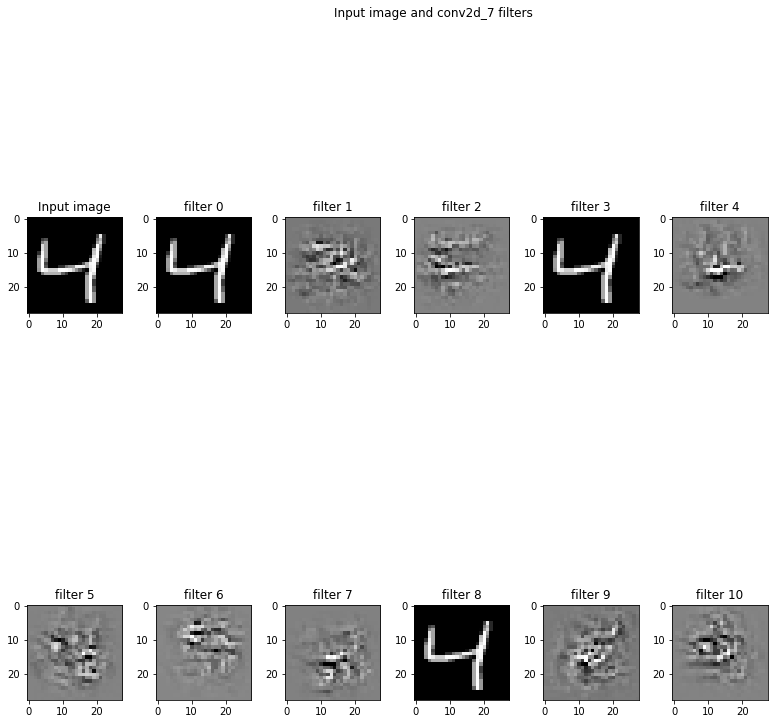

In [21]:
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_7')

Visualization of the 7th convolution layer ( 3x3x10x32 kernel ). One can see that the exact input image itself shows up in many kernels. This is surprising. I currently dont understand the significance of it. This happened even during the 3rd assignment.